# Title: Simple Multi-Layer Perceptron for 507 Project
## Author: Diana Liang
## Date: 4/15/2020

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [4]:
data = pd.read_csv('food_health.csv')
data['is_1'] = data.health == 1
data['is_2'] = data.health == 2
data['is_3'] = data.health == 3
data['is_healthy'] = data.is_1 + data.is_2 + data.is_3

c:\users\luxau\appdata\local\programs\python\python37\lib\site-packages\pandas\core\computation\expressions.py:178: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "


In [5]:
del data['health']
del data['is_1']
del data['is_2']
del data['is_3']

In [6]:
X = data.iloc[:, :9]
Y = data.iloc[:, 9]

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1,
                                                   random_state=0)
miss_train = IterativeImputer(max_iter=100, random_state=0)
new_X_train = miss_train.fit_transform(X_train)
miss_test = IterativeImputer(max_iter=100, random_state=0)
new_X_test = miss_test.fit_transform(X_test)

In [30]:
train_acc = []
for unit in [50, 100, 1000]:
    for act in ['relu', 'elu', 'tanh', 'sigmoid']:
        model = Sequential()
        model.add(Dense(unit, input_dim=9, activation=act))
        model.add(Dense(10, activation=act))
        model.add(Dense(1, activation='softmax'))
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        model.fit(new_X_train, Y_train, epochs=10, batch_size=32)
        _, acc = model.evaluate(new_X_train, Y_train)
        train_acc.append(acc)

Epoch 1/10
16672/16672 [==============================] - 1s 70us/step - loss: 3.3394 - accuracy: 0.7822
Epoch 2/10
16672/16672 [==============================] - 1s 59us/step - loss: 3.3394 - accuracy: 0.7822
Epoch 3/10
16672/16672 [==============================] - 1s 71us/step - loss: 3.3394 - accuracy: 0.7822
Epoch 4/10
16672/16672 [==============================] - 1s 57us/step - loss: 3.3394 - accuracy: 0.7822
Epoch 5/10
16672/16672 [==============================] - 1s 62us/step - loss: 3.3394 - accuracy: 0.7822
Epoch 6/10
16672/16672 [==============================] - 1s 57us/step - loss: 3.3394 - accuracy: 0.7822
Epoch 7/10
16672/16672 [==============================] - 1s 59us/step - loss: 3.3394 - accuracy: 0.7822
Epoch 8/10
16672/16672 [==============================] - 1s 66us/step - loss: 3.3394 - accuracy: 0.7822
Epoch 9/10
16672/16672 [==============================] - 1s 59us/step - loss: 3.3394 - accuracy: 0.7822
Epoch 10/10
16672/16672 [==============================

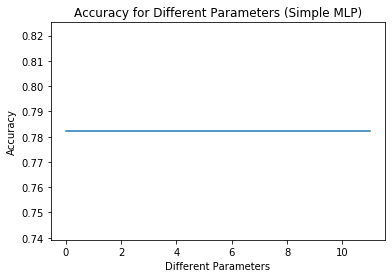

In [32]:
plt.title("Accuracy for Different Parameters (Simple MLP)")
plt.xlabel("Different Parameters")
plt.ylabel("Accuracy")
plt.plot(train_acc)
#plt.savefig('mlp_acc.png')

In [8]:
model = Sequential()
model.add(Dense(50, input_dim=9, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(new_X_train, Y_train, epochs=10, batch_size=32)
Y_pred = model.predict_classes(new_X_test)
accuracy_score(Y_pred, Y_test)

Epoch 1/10
16672/16672 [==============================] - 1s 74us/step - loss: 3.3394 - accuracy: 0.7822
Epoch 2/10
16672/16672 [==============================] - 1s 54us/step - loss: 3.3394 - accuracy: 0.7822
Epoch 3/10
16672/16672 [==============================] - 1s 57us/step - loss: 3.3394 - accuracy: 0.7822
Epoch 4/10
16672/16672 [==============================] - 1s 60us/step - loss: 3.3394 - accuracy: 0.7822
Epoch 5/10
16672/16672 [==============================] - 1s 60us/step - loss: 3.3394 - accuracy: 0.7822
Epoch 6/10
16672/16672 [==============================] - 1s 84us/step - loss: 3.3394 - accuracy: 0.7822
Epoch 7/10
16672/16672 [==============================] - 1s 74us/step - loss: 3.3394 - accuracy: 0.7822
Epoch 8/10
16672/16672 [==============================] - 1s 63us/step - loss: 3.3394 - accuracy: 0.7822
Epoch 9/10
16672/16672 [==============================] - 1s 58us/step - loss: 3.3394 - accuracy: 0.7822
Epoch 10/10
16672/16672 [==============================

0.7981651376146789

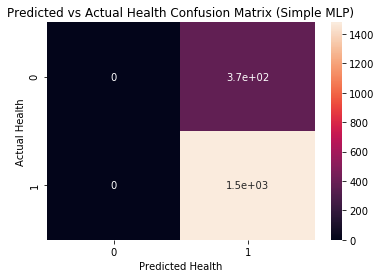

In [9]:
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True)
plt.title("Predicted vs Actual Health Confusion Matrix (Simple MLP)")
plt.xlabel("Predicted Health")
plt.ylabel("Actual Health")
#plt.savefig("mlp_con_mat.png")